Linear Discriminant Analysis (Análise de discriminante linear)

Um classificador com um limite de decisão linear, gerado pela montagem de densidades condicionais de classe aos dados e usando a regra de Bayes.
O modelo ajusta uma densidade gaussiana a cada classe, assumindo que todas as classes compartilham a mesma matriz de covariância.
O modelo ajustado também pode ser usado para reduzir a dimensionalidade da entrada, projetando-a nas direções mais discriminativas.

In [2]:
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import pandas as pd


TRAINING_POINTS_NUMBER = 16000


data = 'data_set/letter-recognition.data'

colums = [
    'letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar',
    'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege',
    'yegvx'
]

df = pd.read_csv(data, names=colums)

accuracy_list = list()

print("Acurácia por pontos usados para treino:")
for training_number in range(100, 16001, 100):

    x_training = np.array(df[:training_number].drop(['letter'], 1))
    y_training = np.array(df[:training_number]['letter'])

    clf = LinearDiscriminantAnalysis()
    clf = clf.fit(x_training, y_training)

    x_test = np.array(df[TRAINING_POINTS_NUMBER:].drop(['letter'], 1))
    y_test = np.array(df[TRAINING_POINTS_NUMBER:]['letter'])

    accuracy = clf.score(x_test, y_test)

    accuracy_list.append(accuracy)
    
    print("{}: ".format(training_number) + str(accuracy))

Acurácia por pontos usados para treino:
100: 0.4245
200: 0.56225
300: 0.61475
400: 0.62925
500: 0.6345
600: 0.64525
700: 0.65425
800: 0.65825
900: 0.66425
1000: 0.6645
1100: 0.66125
1200: 0.6645


/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


1300: 0.669
1400: 0.67025
1500: 0.67225
1600: 0.6745
1700: 0.67225
1800: 0.674
1900: 0.673
2000: 0.67925
2100: 0.6795
2200: 0.68075
2300: 0.68525
2400: 0.68275
2500: 0.68025
2600: 0.6805
2700: 0.68075
2800: 0.68125
2900: 0.6815
3000: 0.68125
3100: 0.6775
3200: 0.67925
3300: 0.67975
3400: 0.68175
3500: 0.68125
3600: 0.6805
3700: 0.681
3800: 0.684
3900: 0.68075
4000: 0.68275
4100: 0.68325
4200: 0.68475
4300: 0.68325
4400: 0.68125
4500: 0.68325
4600: 0.6845
4700: 0.685
4800: 0.68375
4900: 0.683
5000: 0.6815
5100: 0.6795
5200: 0.68125
5300: 0.6815
5400: 0.6805
5500: 0.679
5600: 0.68025
5700: 0.6825
5800: 0.682
5900: 0.6825
6000: 0.68375
6100: 0.68
6200: 0.6825
6300: 0.68175
6400: 0.6825
6500: 0.6825
6600: 0.6835
6700: 0.683
6800: 0.684
6900: 0.68475
7000: 0.685
7100: 0.68525
7200: 0.6875
7300: 0.6855
7400: 0.6865
7500: 0.68675
7600: 0.6865
7700: 0.68725
7800: 0.68925
7900: 0.6875
8000: 0.687
8100: 0.68725
8200: 0.686
8300: 0.68725
8400: 0.68675
8500: 0.68575
8600: 0.68675
8700: 0.688
8800:

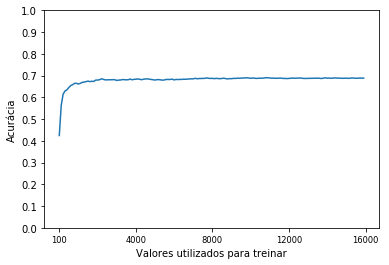

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

# Grafico de acurácia em relação a numero de valores usados para treinar
xticks = ['100', '4000', '8000', '12000', '16000']

plt.plot(accuracy_list)
plt.xlabel('Valores utilizados para treinar')
plt.ylabel('Acurácia')
plt.xticks(range(0, 161, 40), xticks, size='small')
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.show()

In [40]:
predicted = clf.predict(test_points)

# Relatório de classificação
print(metrics.classification_report(test_labels, predicted))

             precision    recall  f1-score   support

          A       0.85      0.81      0.83       156
          B       0.51      0.74      0.60       136
          C       0.65      0.72      0.68       142
          D       0.64      0.83      0.72       167
          E       0.70      0.46      0.56       152
          F       0.60      0.68      0.64       153
          G       0.46      0.45      0.45       164
          H       0.46      0.44      0.45       151
          I       0.87      0.82      0.85       165
          J       0.84      0.74      0.79       148
          K       0.60      0.62      0.61       146
          L       0.93      0.71      0.81       157
          M       0.83      0.87      0.85       144
          N       0.81      0.80      0.80       166
          O       0.54      0.63      0.58       139
          P       0.81      0.71      0.76       168
          Q       0.62      0.57      0.59       168
          R       0.62      0.71      0.66   

In [41]:
# Matriz de confusão
print(metrics.confusion_matrix(test_labels, predicted))

[[126   1   0   0   0   0   0   1   0   6   1   0   2   0   3   0   0   1
    7   0   1   0   1   3   3   0]
 [  0 100   0   1   0   2   1   4   1   0   1   0   0   0   2   0   0  13
    9   0   0   0   0   2   0   0]
 [  0   0 102   0   6   1  12   2   0   0  11   0   1   1   1   0   0   0
    1   1   1   1   1   0   0   0]
 [  0   4   0 139   0   0   2   1   2   1   0   0   1   1   3   0   0   3
    4   0   0   0   0   6   0   0]
 [  0  10  19   1  70   1  20   0   0   0   0   0   0   0   0   0   2   3
    3   0   0   0   0  20   0   3]
 [  0   5   0   5   0 104   4   1   0   0   0   0   0   1   0  19   4   1
    1   3   0   0   2   2   1   0]
 [  1  15  31   1   3   0  73   4   0   0   8   0   2   0   4   0   6   7
    5   0   0   0   2   2   0   0]
 [  1   0   0  10   0   1   2  67   0   0  13   0   2  13  16   2   3   7
    0   0   6   2   1   5   0   0]
 [  0   1   1   2   2   2   1   0 136   2   0   0   0   0   0   3   3   0
    7   0   0   0   0   3   1   1]
 [  0   1   0   3  